In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import skew


In [ ]:
# Charger le dataset original
df = pd.read_excel('Data AI4CKD.xlsx')

In [ ]:
df.head()

,ID,Sexe,Age,Nationalité,Profession (selon catégorie professionnelle),Adresse (Département),Situation Matrimoniale,Motif(s) d'Admission/Asthénie,Motif(s) d'Admission/Altération de la fonction rénale,Motif(s) d'Admission/HTA,...,Pathologies/Rétinopathie diabétique,Pathologies/Artériosclérose,Pathologies/Glaucome,Autres Pathologies,Rythme Cardiaque/Sinusal,Rythme Cardiaque/Régulier,Trouble de la Repolarisation,Stage de l'IRC,Causes Majeure après Diagnostic/HTA,Causes Majeure après Diagnostic/Diabète
0,1,F,50.0,Béninoise,Artisan,Littoral,Marié(e),1.0,0.0,0.0,...,0.0,NaN,0.0,NaN,0.0,NaN,NaN,CKD 5,0.0,0.0
1,2,M,28.0,Béninoise,Artisan,Zou,Marié(e),1.0,1.0,0.0,...,0.0,NaN,0.0,NaN,0.0,NaN,NaN,CKD 5,0.0,0.0
2,3,F,69.0,Béninoise,NaN,Atlantique,Marié(e),1.0,1.0,0.0,...,0.0,NaN,0.0,NaN,0.0,NaN,NaN,CKD 5,0.0,0.0
3,4,M,68.0,Béninoise,Entrepreneur,Plateau,Marié(e),1.0,0.0,1.0,...,0.0,NaN,0.0,Flou visuel,0.0,NaN,Oui,CKD 5,0.0,0.0
4,5,F,68.0,Béninoise,NaN,NaN,Marié(e),1.0,1.0,0.0,...,0.0,NaN,1.0,NaN,0.0,Non,Non,CKD 5,1.0,0.0


In [ ]:
df.shape

(309, 201)

In [ ]:
# Liste des variables sélectionnées
variables_selectionnees = [
    'Age',
    'Sexe',
    'IMC',
    'Enquête Sociale/Tabac',
    'Etat Général (EG)/OMI',
    'Symptômes/Asthénie',
    'Symptômes/Nycturie',
    'BU/Albuminuerie',
    'Urée (g/L)',
    'Créatinine (mg/L)',
    'Hb (g/dL)',
    'Na^+ (meq/L)',
    'K^+ (meq/L)',
    'Pathologies/Rétinopathie hypertensive',
    'Pathologies/Rétinopathie diabétique',
    'Stage de l\'IRC'  # Variable cible
]

In [ ]:
# Créer le nouveau DataFrame
df = df[variables_selectionnees].copy()


In [ ]:
df.head()

,Age,Sexe,IMC,Enquête Sociale/Tabac,Etat Général (EG)/OMI,Symptômes/Asthénie,Symptômes/Nycturie,BU/Albuminuerie,Urée (g/L),Créatinine (mg/L),Hb (g/dL),Na^+ (meq/L),K^+ (meq/L),Pathologies/Rétinopathie hypertensive,Pathologies/Rétinopathie diabétique,Stage de l'IRC
0,50.0,F,NaN,0.0,0.0,0.0,0.0,Non,1.29,169.0,11.4,131.0,6.4,0.0,0.0,CKD 5
1,28.0,M,NaN,0.0,1.0,1.0,0.0,Non,0.66,17.0,9.5,134.0,5.3,0.0,0.0,CKD 5
2,69.0,F,NaN,0.0,1.0,1.0,0.0,Non,0.79,48.0,9.6,139.0,3.4,0.0,0.0,CKD 5
3,68.0,M,NaN,0.0,1.0,0.0,1.0,Non,1.14,42.0,8.2,142.0,5.7,0.0,0.0,CKD 5
4,68.0,F,NaN,0.0,1.0,1.0,0.0,Non,NaN,500.0,9.0,NaN,NaN,1.0,0.0,CKD 5


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309 entries, 0 to 308
Data columns (total 16 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   Age                                    300 non-null    float64
 1   Sexe                                   299 non-null    object 
 2   IMC                                    138 non-null    object 
 3   Enquête Sociale/Tabac                  307 non-null    float64
 4   Etat Général (EG)/OMI                  307 non-null    float64
 5   Symptômes/Asthénie                     307 non-null    float64
 6   Symptômes/Nycturie                     307 non-null    float64
 7   BU/Albuminuerie                        82 non-null     object 
 8   Urée (g/L)                             284 non-null    float64
 9   Créatinine (mg/L)                      307 non-null    float64
 10  Hb (g/dL)                              257 non-null    float64
 11  Na^+ (

In [ ]:
df.describe()

,Age,Enquête Sociale/Tabac,Etat Général (EG)/OMI,Symptômes/Asthénie,Symptômes/Nycturie,Urée (g/L),Créatinine (mg/L),Hb (g/dL),Na^+ (meq/L),K^+ (meq/L),Pathologies/Rétinopathie hypertensive,Pathologies/Rétinopathie diabétique
count,300.000000,307.000000,307.000000,307.000000,307.000000,284.000000,307.000000,257.000000,272.000000,277.000000,307.000000,307.000000
mean,54.503410,0.016287,0.328990,0.286645,0.078176,1.480771,43.390668,12.164788,137.501113,4.542849,0.100977,0.032573
std,15.344702,0.126782,0.470614,0.452933,0.268886,11.303608,69.536271,11.744566,11.310780,3.813975,0.301790,0.177807
min,0.022876,0.000000,0.000000,0.000000,0.000000,0.060000,0.000000,0.140449,0.102639,0.089286,0.000000,0.000000
25%,43.000000,0.000000,0.000000,0.000000,0.000000,0.277500,12.000000,9.000000,137.000000,3.710000,0.000000,0.000000
50%,57.000000,0.000000,0.000000,0.000000,0.000000,0.450000,17.360000,10.900000,139.000000,4.100000,0.000000,0.000000
75%,66.000000,0.000000,1.000000,1.000000,0.000000,0.850000,31.500000,13.000000,142.000000,4.500000,0.000000,0.000000
max,88.000000,1.000000,1.000000,1.000000,1.000000,189.000000,500.000000,118.000000,148.000000,43.000000,1.000000,1.000000


In [ ]:
#Valeur manquante
val_manquante = df.isnull().sum()
val_manquante

Age                                        9
Sexe                                      10
IMC                                      171
Enquête Sociale/Tabac                      2
Etat Général (EG)/OMI                      2
Symptômes/Asthénie                         2
Symptômes/Nycturie                         2
BU/Albuminuerie                          227
Urée (g/L)                                25
Créatinine (mg/L)                          2
Hb (g/dL)                                 52
Na^+ (meq/L)                              37
K^+ (meq/L)                               32
Pathologies/Rétinopathie hypertensive      2
Pathologies/Rétinopathie diabétique        2
Stage de l'IRC                             2
dtype: int64

In [ ]:
df.tail()

,Age,Sexe,IMC,Enquête Sociale/Tabac,Etat Général (EG)/OMI,Symptômes/Asthénie,Symptômes/Nycturie,BU/Albuminuerie,Urée (g/L),Créatinine (mg/L),Hb (g/dL),Na^+ (meq/L),K^+ (meq/L),Pathologies/Rétinopathie hypertensive,Pathologies/Rétinopathie diabétique,Stage de l'IRC
304,65.000000,F,Obese,0.0,1.0,0.0,0.0,Non,0.490000,12.0,12.200000,140.000000,3.700000,0.0,0.0,CKD 3a
305,76.000000,F,Normal,0.0,1.0,0.0,1.0,Non,NaN,13.0,11.900000,140.000000,6.100000,0.0,1.0,CKD 3a
306,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
307,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
308,0.022876,0.026144,0.552288,0.0,0.0,0.0,0.0,0.735294,0.069909,0.0,0.140449,0.102639,0.089286,0.0,0.0,0


In [ ]:
len(df)

309

In [ ]:
# Nous allons supprimer les collones d'ont la valeur manquante dépasse celui de la moitier du dataset
#identifions les colonnes
col_a_supp = val_manquante[val_manquante > (len(df)/2)].index
col_a_supp


Index(['IMC', 'BU/Albuminuerie'], dtype='object')

In [ ]:
#Suspression des colonnes identifier
df = df.drop(col_a_supp , axis = 1)
df.head()

,Age,Sexe,Enquête Sociale/Tabac,Etat Général (EG)/OMI,Symptômes/Asthénie,Symptômes/Nycturie,Urée (g/L),Créatinine (mg/L),Hb (g/dL),Na^+ (meq/L),K^+ (meq/L),Pathologies/Rétinopathie hypertensive,Pathologies/Rétinopathie diabétique,Stage de l'IRC
0,50.0,F,0.0,0.0,0.0,0.0,1.29,169.0,11.4,131.0,6.4,0.0,0.0,CKD 5
1,28.0,M,0.0,1.0,1.0,0.0,0.66,17.0,9.5,134.0,5.3,0.0,0.0,CKD 5
2,69.0,F,0.0,1.0,1.0,0.0,0.79,48.0,9.6,139.0,3.4,0.0,0.0,CKD 5
3,68.0,M,0.0,1.0,0.0,1.0,1.14,42.0,8.2,142.0,5.7,0.0,0.0,CKD 5
4,68.0,F,0.0,1.0,1.0,0.0,NaN,500.0,9.0,NaN,NaN,1.0,0.0,CKD 5


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309 entries, 0 to 308
Data columns (total 14 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   Age                                    300 non-null    float64
 1   Sexe                                   299 non-null    object 
 2   Enquête Sociale/Tabac                  307 non-null    float64
 3   Etat Général (EG)/OMI                  307 non-null    float64
 4   Symptômes/Asthénie                     307 non-null    float64
 5   Symptômes/Nycturie                     307 non-null    float64
 6   Urée (g/L)                             284 non-null    float64
 7   Créatinine (mg/L)                      307 non-null    float64
 8   Hb (g/dL)                              257 non-null    float64
 9   Na^+ (meq/L)                           272 non-null    float64
 10  K^+ (meq/L)                            277 non-null    float64
 11  Pathol

In [ ]:
# Gestion des valeurs manquantes: quantitatives
# Sélection des colonnes de type quantitatives

variables_numeriques = df.select_dtypes(include=['number']).columns.tolist()
variables_numeriques_categorielles = []
variables_numeriques_non_categorielles = []

for variable in variables_numeriques:
    if df[variable].nunique() <= 2:
        variables_numeriques_categorielles.append(variable)
    else:
        variables_numeriques_non_categorielles.append(variable)


In [ ]:
variables_numeriques_non_categorielles

['Age',
 'Urée (g/L)',
 'Créatinine (mg/L)',
 'Hb (g/dL)',
 'Na^+ (meq/L)',
 'K^+ (meq/L)']

In [ ]:
# Remplacement des valeurs manquantes
for colonne in variables_numeriques_non_categorielles:
    # Calcul du coefficient d'asymétrie
    asymetrie = skew(df[colonne].dropna())

    # Remplacement par la moyenne ou la médiane
    if -0.5 <= asymetrie <= 0.5:  # Considérons une asymétrie entre -0.5 et 0.5 comme symétrique
        df[colonne].fillna(df[colonne].mean(), inplace=True)
    else:
        df[colonne].fillna(df[colonne].median(), inplace=True)



C:\Users\Maurel DSA\AppData\Local\Temp\ipykernel_18484\2307013573.py:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[colonne].fillna(df[colonne].mean(), inplace=True)
C:\Users\Maurel DSA\AppData\Local\Temp\ipykernel_18484\2307013573.py:10: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a

In [ ]:
# Gestion des valeurs manquantes: Catégorielles
# Sélection des colonnes de type Catégorielles

valeur_categorielles = df.select_dtypes(include=['object']).columns.tolist()
valeur_categorielles.extend(variables_numeriques_categorielles)

In [ ]:
valeur_categorielles

['Sexe',
 "Stage de l'IRC",
 'Enquête Sociale/Tabac',
 'Etat Général (EG)/OMI',
 'Symptômes/Asthénie',
 'Symptômes/Nycturie',
 'Pathologies/Rétinopathie hypertensive',
 'Pathologies/Rétinopathie diabétique']

In [ ]:
#Remplacement des valeur manquantes :
for col in valeur_categorielles:
    mode = df[col].mode()[0]
    df[col].fillna(mode, inplace = True)

C:\Users\Maurel DSA\AppData\Local\Temp\ipykernel_18484\500439912.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(mode, inplace = True)


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309 entries, 0 to 308
Data columns (total 14 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   Age                                    309 non-null    float64
 1   Sexe                                   309 non-null    object 
 2   Enquête Sociale/Tabac                  309 non-null    float64
 3   Etat Général (EG)/OMI                  309 non-null    float64
 4   Symptômes/Asthénie                     309 non-null    float64
 5   Symptômes/Nycturie                     309 non-null    float64
 6   Urée (g/L)                             309 non-null    float64
 7   Créatinine (mg/L)                      309 non-null    float64
 8   Hb (g/dL)                              309 non-null    float64
 9   Na^+ (meq/L)                           309 non-null    float64
 10  K^+ (meq/L)                            309 non-null    float64
 11  Pathol

In [ ]:
df.isnull().sum()

Age                                      0
Sexe                                     0
Enquête Sociale/Tabac                    0
Etat Général (EG)/OMI                    0
Symptômes/Asthénie                       0
Symptômes/Nycturie                       0
Urée (g/L)                               0
Créatinine (mg/L)                        0
Hb (g/dL)                                0
Na^+ (meq/L)                             0
K^+ (meq/L)                              0
Pathologies/Rétinopathie hypertensive    0
Pathologies/Rétinopathie diabétique      0
Stage de l'IRC                           0
dtype: int64

In [ ]:
df

,Age,Sexe,Enquête Sociale/Tabac,Etat Général (EG)/OMI,Symptômes/Asthénie,Symptômes/Nycturie,Urée (g/L),Créatinine (mg/L),Hb (g/dL),Na^+ (meq/L),K^+ (meq/L),Pathologies/Rétinopathie hypertensive,Pathologies/Rétinopathie diabétique,Stage de l'IRC
0,50.000000,F,0.0,0.0,0.0,0.0,1.290000,169.00,11.400000,131.000000,6.400000,0.0,0.0,CKD 5
1,28.000000,M,0.0,1.0,1.0,0.0,0.660000,17.00,9.500000,134.000000,5.300000,0.0,0.0,CKD 5
2,69.000000,F,0.0,1.0,1.0,0.0,0.790000,48.00,9.600000,139.000000,3.400000,0.0,0.0,CKD 5
3,68.000000,M,0.0,1.0,0.0,1.0,1.140000,42.00,8.200000,142.000000,5.700000,0.0,0.0,CKD 5
4,68.000000,F,0.0,1.0,1.0,0.0,0.450000,500.00,9.000000,139.000000,4.100000,1.0,0.0,CKD 5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
304,65.000000,F,0.0,1.0,0.0,0.0,0.490000,12.00,12.200000,140.000000,3.700000,0.0,0.0,CKD 3a
305,76.000000,F,0.0,1.0,0.0,1.0,0.450000,13.00,11.900000,140.000000,6.100000,0.0,1.0,CKD 3a
306,54.503410,M,0.0,0.0,0.0,0.0,0.450000,17.36,10.900000,139.000000,4.100000,0.0,0.0,CKD 5
307,54.503410,M,0.0,0.0,0.0,0.0,0.450000,17.36,10.900000,139.000000,4.100000,0.0,0.0,CKD 5


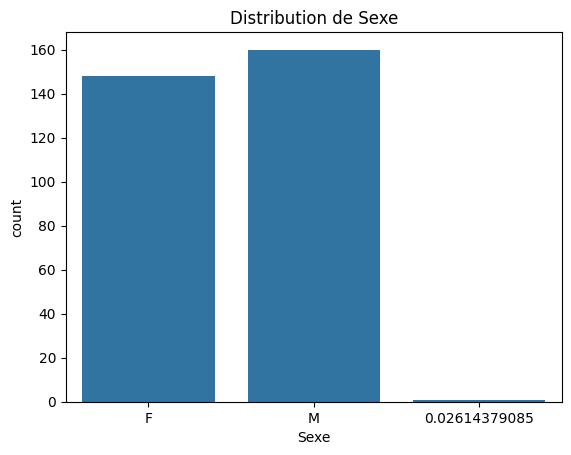

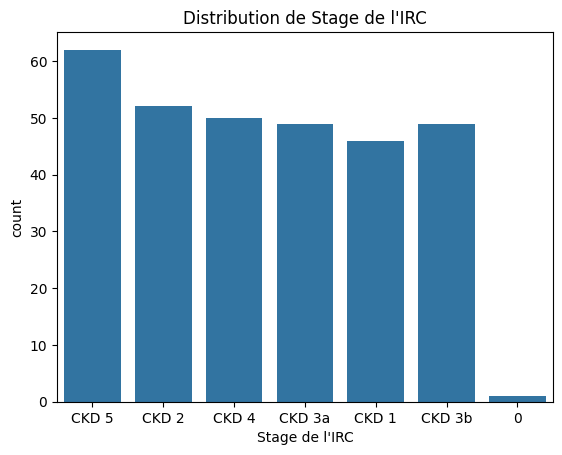

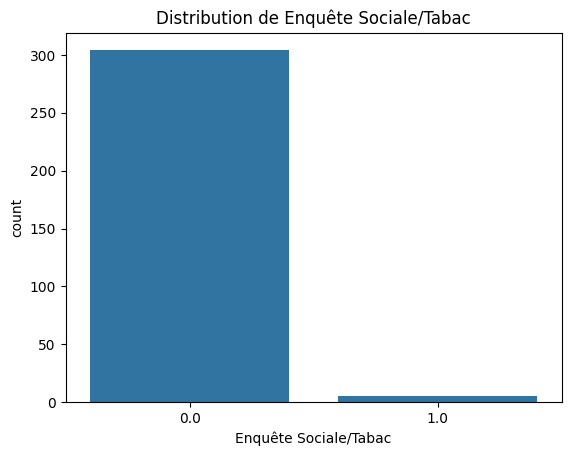

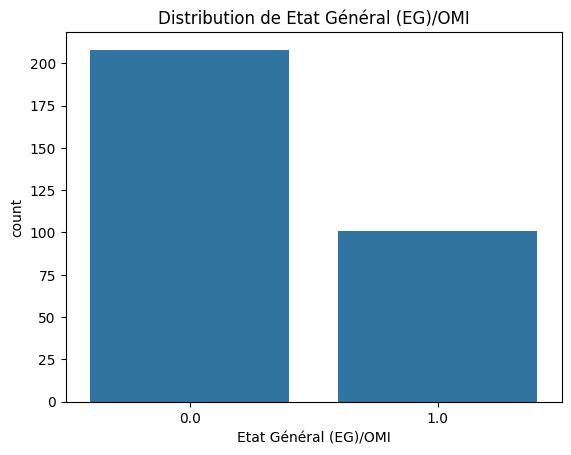

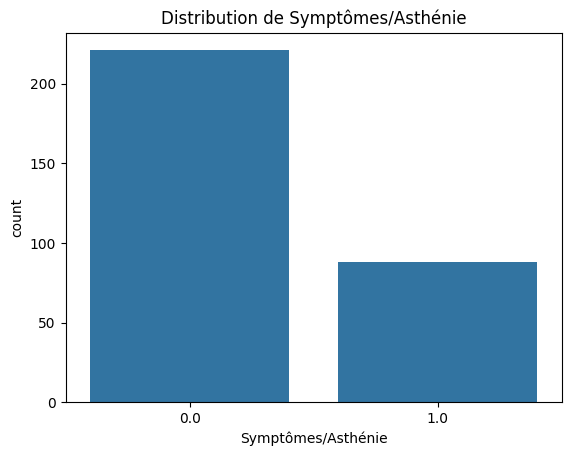

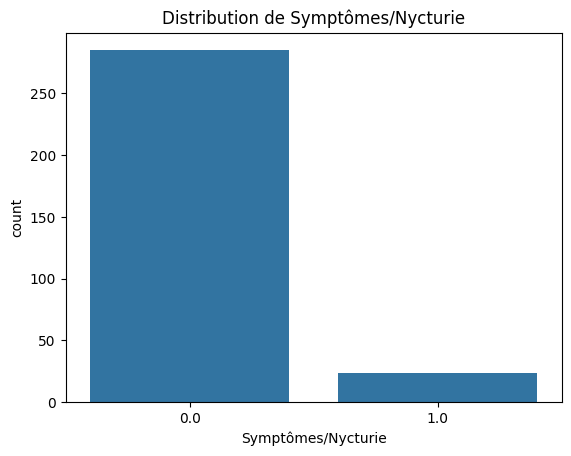

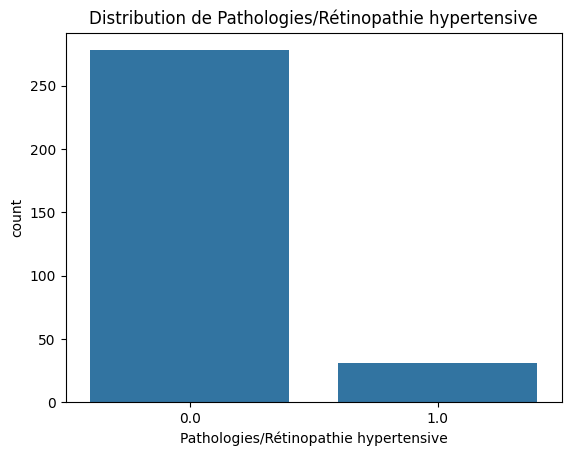

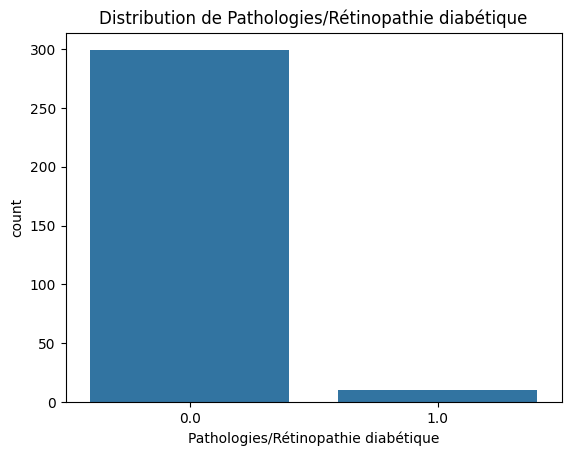

In [ ]:
for col in valeur_categorielles:
    sns.countplot(x=col, data=df)
    plt.title(f"Distribution de {col}")
    plt.show()

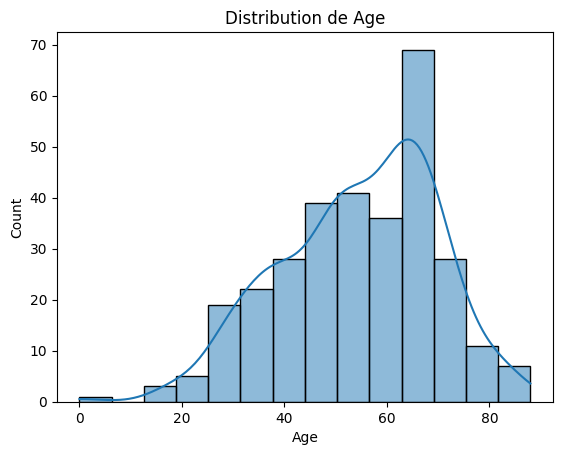

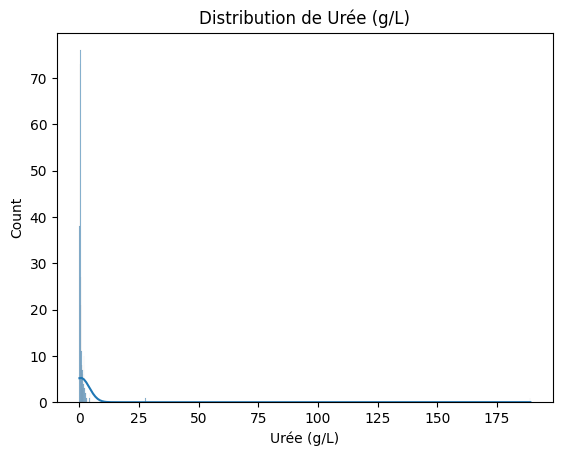

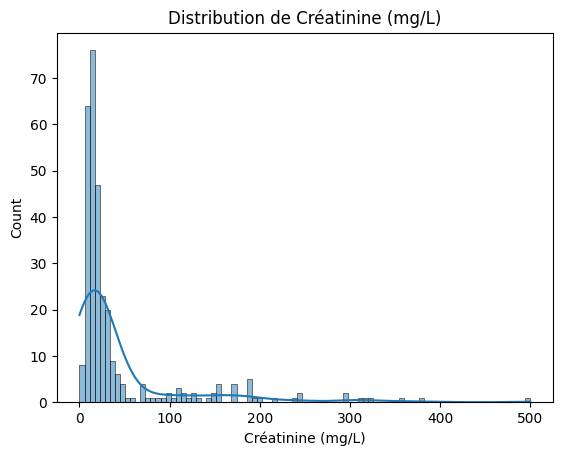

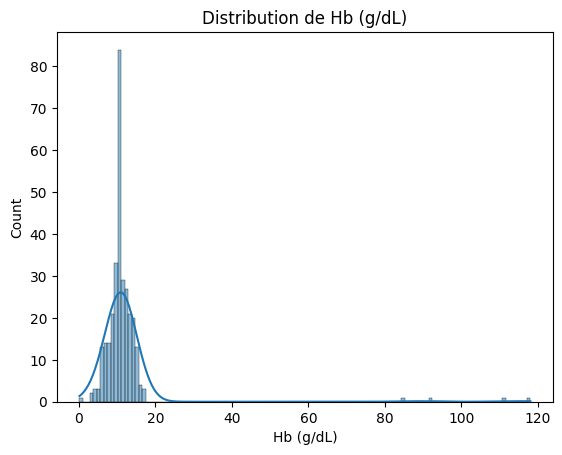

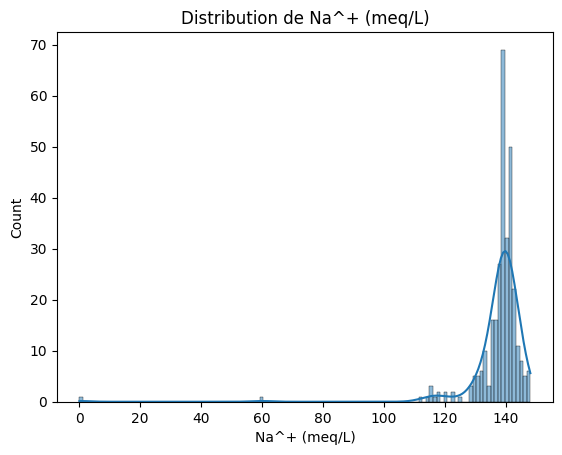

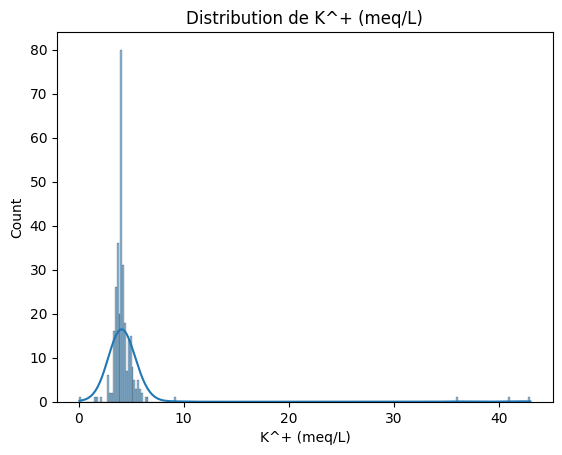

In [ ]:
# Distribution des variables quantitatives
for col in variables_numeriques_non_categorielles:
    sns.histplot(df[col], kde=True)
    plt.title(f"Distribution de {col}")
    plt.show()

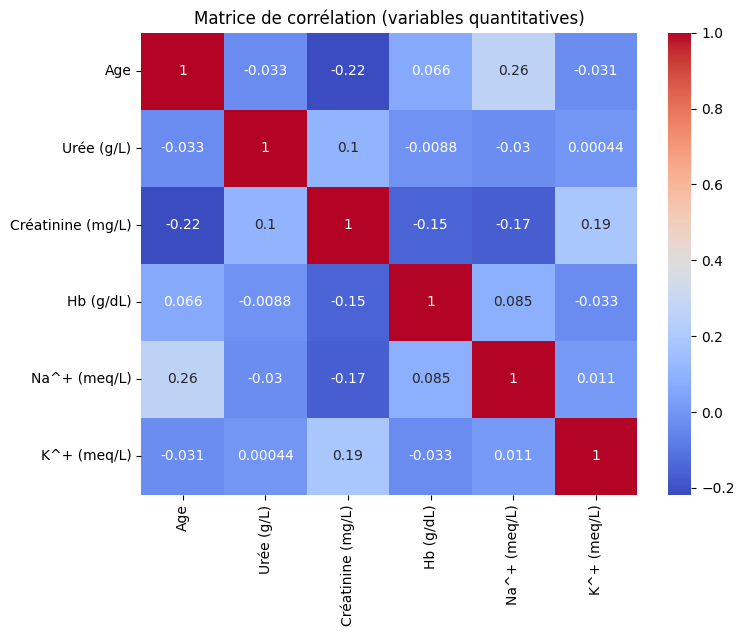

In [ ]:
# Matrice de corrélation pour les variables quantitatives
if len(variables_numeriques_non_categorielles) > 1:
    plt.figure(figsize=(8, 6))
    sns.heatmap(df[variables_numeriques_non_categorielles].corr(), annot=True, cmap='coolwarm')
    plt.title('Matrice de corrélation (variables quantitatives)')
    plt.show()



In [ ]:

# Matrices de contingence pour les paires de variables catégorielles
if len(valeur_categorielles) > 1:
    for i in range(len(valeur_categorielles)):
        for j in range(i + 1, len(valeur_categorielles)):
            colonne1 = valeur_categorielles[i]
            colonne2 = valeur_categorielles[j]
            matrice_contingence = pd.crosstab(df[colonne1], df[colonne2])
            print(f"Matrice de contingence: {colonne1} vs {colonne2}")
            print(matrice_contingence)
            print("\n")



Matrice de contingence: Sexe vs Stage de l'IRC
Stage de l'IRC  0  CKD 1  CKD 2  CKD 3a  CKD 3b  CKD 4  CKD 5
Sexe                                                         
0.026144        1      0      0       0       0      0      0
F               0     23     24      25      24     23     29
M               0     23     28      24      25     27     33


Matrice de contingence: Sexe vs Enquête Sociale/Tabac
Enquête Sociale/Tabac  0.0  1.0
Sexe                           
0.026144                 1    0
F                      147    1
M                      156    4


Matrice de contingence: Sexe vs Etat Général (EG)/OMI
Etat Général (EG)/OMI  0.0  1.0
Sexe                           
0.026144                 1    0
F                       93   55
M                      114   46


Matrice de contingence: Sexe vs Symptômes/Asthénie
Symptômes/Asthénie  0.0  1.0
Sexe                        
0.026144              1    0
F                   101   47
M                   119   41


Matrice de 

In [ ]:
# Encodage de la variable catégorielle Sexe
df['Sexe'] = df['Sexe'].map({'M': 1, 'F': 0})

In [ ]:
# Encodage de la variable catégorielle Stage de l'IRC
df["Stage de l'IRC"] = df["Stage de l'IRC"].map({'CKD 1': 1, 'CKD 2': 2, 'CKD 3a': 3, 'CKD 3b': 4, 'CKD 4': 5, 'CKD 5': 6})

In [ ]:
df.head()

,Age,Sexe,Enquête Sociale/Tabac,Etat Général (EG)/OMI,Symptômes/Asthénie,Symptômes/Nycturie,Urée (g/L),Créatinine (mg/L),Hb (g/dL),Na^+ (meq/L),K^+ (meq/L),Pathologies/Rétinopathie hypertensive,Pathologies/Rétinopathie diabétique,Stage de l'IRC
0,50.0,0.0,0.0,0.0,0.0,0.0,1.29,169.0,11.4,131.0,6.4,0.0,0.0,6.0
1,28.0,1.0,0.0,1.0,1.0,0.0,0.66,17.0,9.5,134.0,5.3,0.0,0.0,6.0
2,69.0,0.0,0.0,1.0,1.0,0.0,0.79,48.0,9.6,139.0,3.4,0.0,0.0,6.0
3,68.0,1.0,0.0,1.0,0.0,1.0,1.14,42.0,8.2,142.0,5.7,0.0,0.0,6.0
4,68.0,0.0,0.0,1.0,1.0,0.0,0.45,500.0,9.0,139.0,4.1,1.0,0.0,6.0


In [ ]:
df = df.iloc[:-3]

In [ ]:
df

,Age,Sexe,Enquête Sociale/Tabac,Etat Général (EG)/OMI,Symptômes/Asthénie,Symptômes/Nycturie,Urée (g/L),Créatinine (mg/L),Hb (g/dL),Na^+ (meq/L),K^+ (meq/L),Pathologies/Rétinopathie hypertensive,Pathologies/Rétinopathie diabétique,Stage de l'IRC
0,50.0,0.0,0.0,0.0,0.0,0.0,1.29,169.0,11.4,131.0,6.4,0.0,0.0,6.0
1,28.0,1.0,0.0,1.0,1.0,0.0,0.66,17.0,9.5,134.0,5.3,0.0,0.0,6.0
2,69.0,0.0,0.0,1.0,1.0,0.0,0.79,48.0,9.6,139.0,3.4,0.0,0.0,6.0
3,68.0,1.0,0.0,1.0,0.0,1.0,1.14,42.0,8.2,142.0,5.7,0.0,0.0,6.0
4,68.0,0.0,0.0,1.0,1.0,0.0,0.45,500.0,9.0,139.0,4.1,1.0,0.0,6.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
301,64.0,0.0,0.0,1.0,1.0,0.0,0.41,13.0,12.8,145.0,3.6,0.0,0.0,3.0
302,34.0,0.0,0.0,0.0,0.0,0.0,0.25,15.0,10.2,136.0,4.1,0.0,0.0,3.0
303,43.0,0.0,0.0,0.0,0.0,0.0,0.30,16.0,10.9,140.0,4.2,0.0,0.0,3.0
304,65.0,0.0,0.0,1.0,0.0,0.0,0.49,12.0,12.2,140.0,3.7,0.0,0.0,3.0


In [ ]:
# Modellisation
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, ConfusionMatrixDisplay
from sklearn.model_selection import RandomizedSearchCV, train_test_split
from scipy.stats import randint

# Visualisation de l'arbre
from sklearn.tree import export_graphviz
from IPython.display import Image
import graphviz

In [ ]:
# Diviser les données en entités (X) et cible (y)
X = df.drop("Stage de l'IRC", axis=1)
y = df["Stage de l'IRC"]


In [ ]:
X

,Age,Sexe,Enquête Sociale/Tabac,Etat Général (EG)/OMI,Symptômes/Asthénie,Symptômes/Nycturie,Urée (g/L),Créatinine (mg/L),Hb (g/dL),Na^+ (meq/L),K^+ (meq/L),Pathologies/Rétinopathie hypertensive,Pathologies/Rétinopathie diabétique
0,50.0,0.0,0.0,0.0,0.0,0.0,1.29,169.0,11.4,131.0,6.4,0.0,0.0
1,28.0,1.0,0.0,1.0,1.0,0.0,0.66,17.0,9.5,134.0,5.3,0.0,0.0
2,69.0,0.0,0.0,1.0,1.0,0.0,0.79,48.0,9.6,139.0,3.4,0.0,0.0
3,68.0,1.0,0.0,1.0,0.0,1.0,1.14,42.0,8.2,142.0,5.7,0.0,0.0
4,68.0,0.0,0.0,1.0,1.0,0.0,0.45,500.0,9.0,139.0,4.1,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
301,64.0,0.0,0.0,1.0,1.0,0.0,0.41,13.0,12.8,145.0,3.6,0.0,0.0
302,34.0,0.0,0.0,0.0,0.0,0.0,0.25,15.0,10.2,136.0,4.1,0.0,0.0
303,43.0,0.0,0.0,0.0,0.0,0.0,0.30,16.0,10.9,140.0,4.2,0.0,0.0
304,65.0,0.0,0.0,1.0,0.0,0.0,0.49,12.0,12.2,140.0,3.7,0.0,0.0


In [ ]:
#variable cible
y

0      6.0
1      6.0
2      6.0
3      6.0
4      6.0
      ... 
301    3.0
302    3.0
303    3.0
304    3.0
305    3.0
Name: Stage de l'IRC, Length: 306, dtype: float64

In [ ]:
# Diviser les données en ensembles d'entrainement et de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [ ]:
#création une instance du modèle Random forest avec les paramètres par défaut
rf = RandomForestClassifier()

In [ ]:
param_dist = {'n_estimators': randint(50,500),
              'max_depth': randint(1,20)}

In [ ]:
# Utiliser la recherhe aléatoire pour trouver les meilleurs hyperparametres
rand_search = RandomizedSearchCV(rf,
                                 param_distributions = param_dist,
                                 n_iter=5,
                                 cv=5)


In [ ]:

rand_search.fit(X_train, y_train)

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=5,
                   param_distributions={'max_depth': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x00000158E510B4D0>,
                                        'n_estimators': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x00000158E5800980>})

In [ ]:
# Creer la variable pour récuperer le meilleur modèle
best_rf = rand_search.best_estimator_



In [ ]:
# Afficher les meilleurs hyperparametres
print('Meilleurs hyperparametres:',  rand_search.best_params_)

Meilleurs hyperparametres: {'max_depth': 19, 'n_estimators': 154}


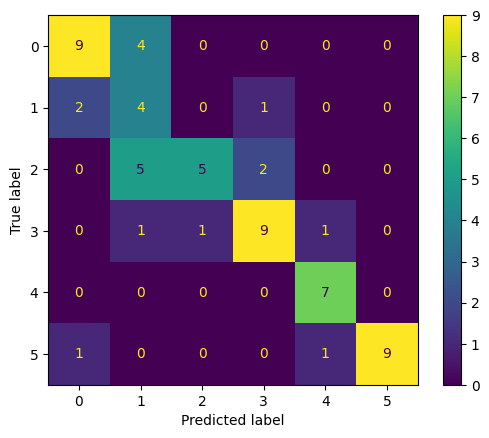

In [ ]:
# Generer la prediction avec le meilleurs model  with the best model
y_pred = best_rf.predict(X_test)

# Création de la matrice de confusion
cm = confusion_matrix(y_test, y_pred)

ConfusionMatrixDisplay(confusion_matrix=cm).plot();

In [ ]:
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.6935483870967742


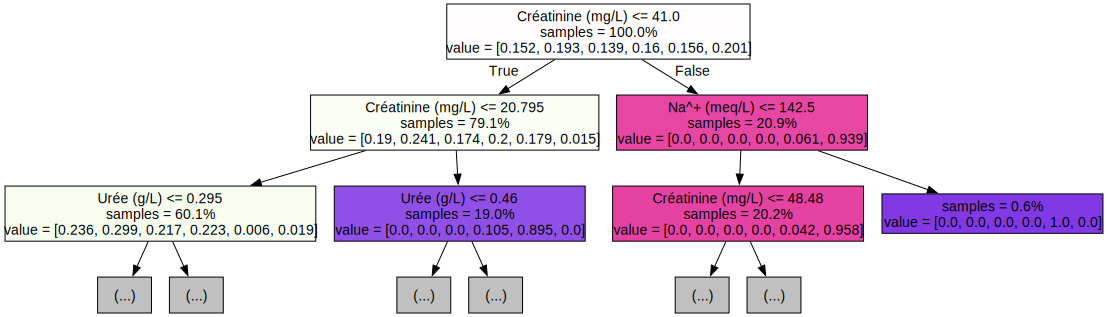

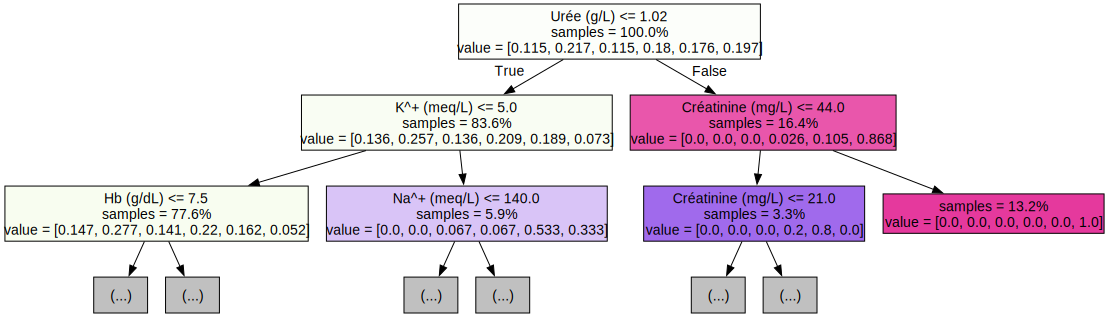

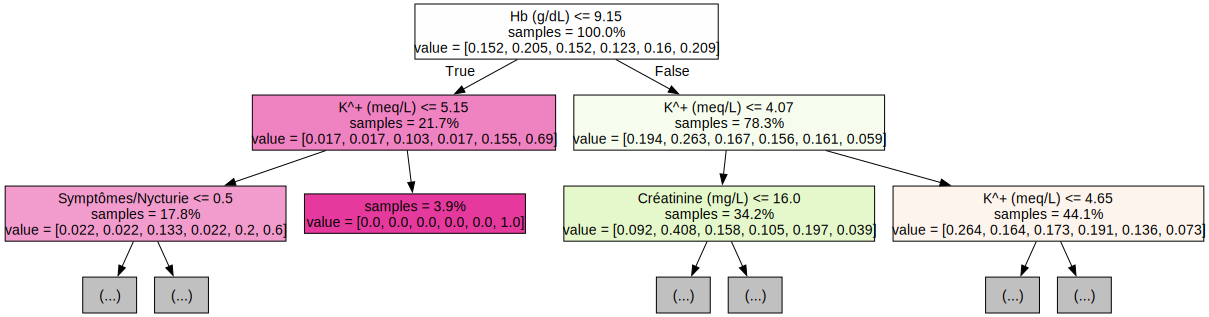

In [ ]:
# Exporter les trois premiers arbres de décision de la forêt

for i in range(3):
    tree = best_rf.estimators_[i]
    dot_data = export_graphviz(tree,
                               feature_names=X_train.columns,
                               filled=True,
                               max_depth=2,
                               impurity=False,
                               proportion=True)
    graph = graphviz.Source(dot_data)
    display(graph)

In [ ]:
# Obtenir l'importance des variables
importance = best_rf.feature_importances_

In [ ]:
# Créer un DataFrame pour afficher l'importance des variables
importance_df = pd.DataFrame({'Variables':X.columns, 'Importance': importance})
importance_df = importance_df.sort_values(by = 'Importance', ascending = False).reset_index(drop = True)



In [ ]:
# Affichons l'importance des variables
print("Importance des variables :")
print(importance_df)

Importance des variables :
                                Variables  Importance
0                       Créatinine (mg/L)    0.379310
1                              Urée (g/L)    0.162705
2                               Hb (g/dL)    0.119275
3                                     Age    0.092282
4                             K^+ (meq/L)    0.083618
5                            Na^+ (meq/L)    0.078785
6                      Symptômes/Asthénie    0.025014
7                                    Sexe    0.021264
8                   Etat Général (EG)/OMI    0.017351
9   Pathologies/Rétinopathie hypertensive    0.009247
10                     Symptômes/Nycturie    0.007576
11    Pathologies/Rétinopathie diabétique    0.003381
12                  Enquête Sociale/Tabac    0.000191


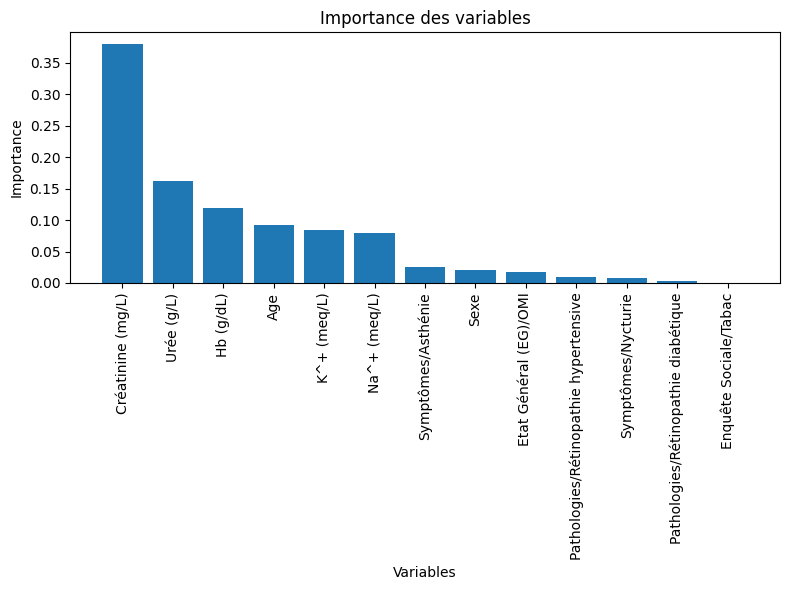

In [ ]:
# Tracer l'importance des variables
plt.figure(figsize=(8,6))
plt.bar(importance_df['Variables'], importance_df['Importance'])
plt.xticks(rotation = 'vertical')
plt.xlabel('Variables')
plt.ylabel('Importance')
plt.title('Importance des variables')
plt.tight_layout()
plt.show()

In [ ]:
# Sérialisation \ Enregistrement du modèle
import joblib
joblib.dump(best_rf, 'ramdom_forest_model_MRC.pkl')

['ramdom_forest_model_MRC.pkl']